# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [7]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########

        S_W = np.zeros((n_features, n_features))
        for label in labels:
            S_i = np.zeros((n_features, n_features))
            X_i = X[y == label]
            m_i = np.mean(X_i, axis=0)
            for x in X_i:
                x, m_i = x.reshape(n_features, 1), m_i.reshape(n_features, 1)
                S_i += (x - m_i).dot((x - m_i).T)
            S_W += S_i
        S_W = S_W + 0.005 * np.eye(S_W.shape[0])

        ############################################



        # Between class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########

        S_B = np.zeros((n_features, n_features))
        m = np.mean(X, axis=0).reshape(n_features, 1)
        for label in labels:
            X_i = X[y == label]
            m_i = np.mean(X_i, axis=0)
            n_i = X_i.shape[0]
            m_i, m = m_i.reshape(n_features, 1), m.reshape(n_features, 1)
            S_B += n_i * (m_i - m).dot((m_i - m).T)

        ############################################

      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        
        S_W_inv = np.linalg.inv(S_W)
        SW_inv_SB = S_W_inv.dot(S_B)

        ############################################



        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########

        eigenvalues, eigenvectors = np.linalg.eig(SW_inv_SB)

        ############################################



        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X, y):
        ########### Write Your Code Here ###########

        self.fit(X, y)
        X_transformed = self.transform(X)
        return X_transformed

        ############################################

  
    def transform(self, X):
        ########### Write Your Code Here ###########

        X_transformed = X.dot(self.eigenvectors)
        return X_transformed

        ############################################

    def predict(self, X):
        ########### Write Your Code Here ###########
        y_pred = []

        X_transformed = self.transform(X)
        for x in X_transformed:
            x = x.reshape(x.shape[0], 1)
            distances = [np.linalg.norm(x - self.eigenvectors[:, i].reshape(x.shape[0], 1)) for i in range(self.eigenvectors.shape[1])]
            y_pred.append(np.argmin(distances))
        return y_pred

        

        ############################################

- <font size=4> Dimensionality reduction visualization<font>

C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\4153319095.py:32: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\4153319095.py:33: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\4153319095.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\4153319095.py:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


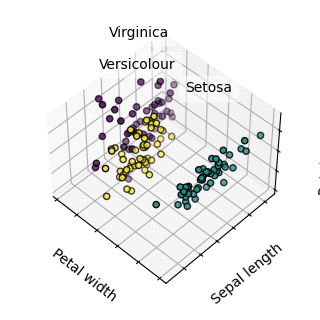

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [9]:
#get minist dataset
########### Write Your Code Here ###########

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target
X = X.astype(np.float64)
y = y.astype(np.float64)
print(X.shape, y.shape)

X = np.array(X)
y = np.array(y)
X = X / 255.0

############################################

C:\Users\Wiman\.conda\envs\ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


###  Visualization of MINIST

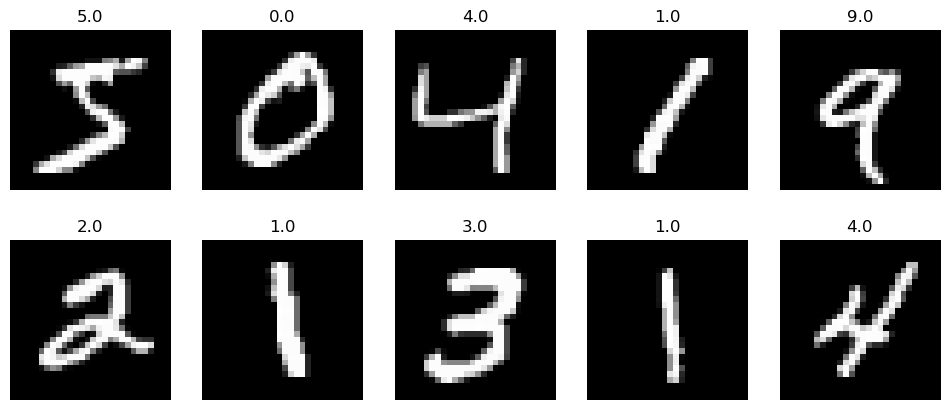

In [10]:
# Visualize MINIST
########### Write Your Code Here ###########

import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(y[i])
    ax.axis('off')
plt.show()

############################################

### Fit  Model

In [11]:
########### Write Your Code Here ###########

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = LDA(n_components=128)
pca.fit(X_train, y_train)
X_train_transform = pca.transform(X_train).astype(np.float64)
X_test_transform = pca.transform(X_test).astype(np.float64)
X_train_transform.shape, X_test_transform.shape

############################################

C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\1149913161.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train_transform = pca.transform(X_train).astype(np.float64)
C:\Users\Wiman\AppData\Local\Temp\ipykernel_15800\1149913161.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test_transform = pca.transform(X_test).astype(np.float64)


((52500, 128), (17500, 128))

## Evaluate model

In [12]:
########### Write Your Code Here ###########

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ori = LogisticRegression()
# ori.fit(X_train, y_train)
# y_pred = ori.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("ORI Accuracy: ", accuracy)
# 
# 
# trf = LogisticRegression()
# trf.fit(X_train_transform, y_train)
# y_pred = trf.predict(X_test_transform)
# accuracy = accuracy_score(y_test, y_pred)
# print("LDA Accuracy: ", accuracy)

# ori = KNeighborsClassifier(10)
# ori.fit(X_train, y_train)
# y_pred = ori.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("ORI Accuracy: ", accuracy)
# 
# 
trf = KNeighborsClassifier(10)
trf.fit(X_train_transform, y_train)
y_pred = trf.predict(X_test_transform)
accuracy = accuracy_score(y_test, y_pred)
print("LDA Accuracy: ", accuracy)


# sk_LDA = LinearDiscriminantAnalysis()
# sk_LDA.fit(X_train, y_train)
# y_pred = sk_LDA.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

############################################


LDA Accuracy:  0.9092


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?
Pros
1）在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。
2）LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。
Cons
1）LDA不适合对非高斯分布样本进行降维，PCA也有这个问题。
2）LDA降维最多降到类别数k-1的维数，如果我们降维的维度大于k-1，则不能使用LDA。
3）LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。
4）LDA可能过度拟合数据。

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?
1）LDA是有监督的降维方法，而PCA是无监督的降维方法
2）LDA降维最多降到类别数k-1的维数，而PCA没有这个限制。
3）LDA除了可以用于降维，还可以用于分类。
4）LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向。